# Лабораторная работа №4


### ***Задача №1***

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
from scipy import stats
%matplotlib inline

In [2]:
os.chdir("C:/Users/вячеслав/Desktop/Задачи_для_лабораторной_4/Задачи для лабораторной 4/Nursing Home Data/")

In [3]:
#df = pd.read_csv('Nursing Home Data_data.csv', encoding='cp1251')
#df = df.set_index(u'номер')
df = pd.read_csv("Nursing Home Data_data.csv", delimiter = ';', decimal = ',')

In [4]:
df.head()

,BED,MCDAYS,TDAYS,PCREV,NSAL,FEXP,RURAL
0,244,128,385,23521,5230,5334,0
1,59,155,203,9160,2459,493,1
2,120,281,392,21900,6304,6115,0
3,120,291,419,22354,6590,6346,0
4,120,238,363,17421,5362,6225,0


 Сохраним в отдельные переменные выборки, которые собираемся сравнивать.

In [5]:
x = df[df['RURAL'] == 1]['FEXP']
y = df[df['RURAL'] == 0]['FEXP']
x.name, y.name = 'rural', 'non-rural'

Для начала проверим гиоптезу о нормальности распределения, для этого посмотрим на гистограммы и потом обратимся к критерию Шапиро. 

In [19]:
def two_histograms(x, y):
# После определения функции полезно бывает добавить её описание в таком стиле.
# Тройные кавычки -- для обрамления многострочных строковых литералов.
    """
    Функция, которая построит две гистограммы на одной картинке.
    Дополнительно пунктирными линиями указываются средние значения выборок.
    x: вектор pd.Series,
    y: вектор pd.Series
    """
    x.hist(alpha=0.5, weights=[1./len(x)]*len(x))
    y.hist(alpha=0.5, weights=[1./len(y)]*len(y))
    plt.axvline(y.mean(), color='red', alpha=0.8, linestyle='dashed')
    plt.axvline(x.mean(), color='blue', alpha=0.8, linestyle='dashed')
    plt.legend([x.name, y.name])

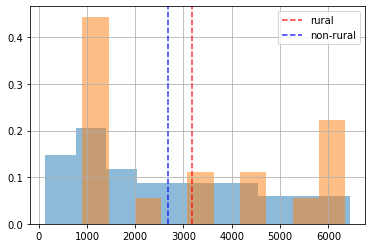

In [20]:
two_histograms(x, y)

Из гистограмм видно, что распредление расходов городских больниц не нормально, убедимся в этом еще раз посмотрев на критерий Шапиро. 

In [8]:
res = stats.shapiro(x)
print('p-value: ', res[1])

p-value:  0.04017774015665054


In [9]:
res = stats.shapiro(y)
print('p-value: ', res[1])

p-value:  0.003969298675656319


В обоих случаях получили p-value меньше уровня значимости 0.05, значит распределение не нормальные, то есть нам придется пользоваться критерием Манна - Уитни. 

In [10]:
res = stats.mannwhitneyu(x, y)
print('p-value:', res[1])

p-value: 0.26594759448891914


Получили p-value гораздо больше уровня значимости 0.05, значит гипотеза о равенстве медиан расходов городских больниц и сельскими больницами не отвергнута. 

Теперь для большей наглядности, нарисуем ящики с усами для обеих выборок. 

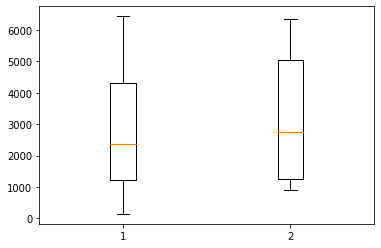

In [12]:
import matplotlib.pyplot as plt

plt.boxplot([x, y])
plt.show()

**Интерпретируем результат:** расходы больниц за городом и сельских больниц можно считать примерно равными. 

### ***Задача №2***

In [25]:
os.chdir("C:/Users/вячеслав/Desktop/Задачи_для_лабораторной_4/Задачи для лабораторной 4/Unions and State Labor Law/")

In [26]:
df = pd.read_csv("Unions and State Labor Law_data.csv", delimiter = ',', decimal = '.')
#df = pd.read_csv('Nursing Home Data_data.csv', encoding='cp1251')

In [27]:
df.head()

,STATE,DENS,COMP,RTW,PVT
0,NY,56.9,1,0,31.2
1,MI,49.6,1,0,30.2
2,WA,32.4,1,0,33.1
3,HI,54.6,1,0,24.7
4,AK,30.7,1,0,30.1


Сохраним в отдельные переменные выборки, которые собираемся сравнивать.

In [28]:
x = df[df['RTW'] == 1]['DENS']
y = df[df['RTW'] == 0]['DENS']
x.name, y.name = 'accepted', 'not accepted'

Для начала проверим гиоптезу о нормальности распределения, для этого посмотрим на гистограммы и потом обратимся к критерию Шапиро.

In [29]:
def two_histograms(x, y):
# После определения функции полезно бывает добавить её описание в таком стиле.
# Тройные кавычки -- для обрамления многострочных строковых литералов.
    """
    Функция, которая построит две гистограммы на одной картинке.
    Дополнительно пунктирными линиями указываются средние значения выборок.
    x: вектор pd.Series,
    y: вектор pd.Series
    """
    x.hist(alpha=0.5, weights=[1./len(x)]*len(x))
    y.hist(alpha=0.5, weights=[1./len(y)]*len(y))
    plt.axvline(y.mean(), color='red', alpha=0.8, linestyle='dashed')
    plt.axvline(x.mean(), color='blue', alpha=0.8, linestyle='dashed')
    plt.legend([x.name, y.name])

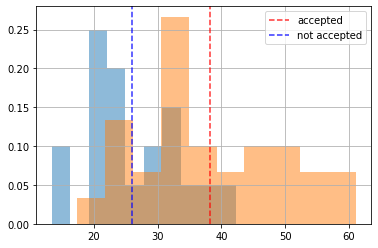

In [30]:
two_histograms(x, y)

Гистограммы похожи на нормальные, проверим это еще и критерием Шапиро. 

In [42]:
res = stats.shapiro(x)
print('p-value: ', res[1])

p-value:  0.6463996171951294


In [43]:
res = stats.shapiro(y)
print('p-value: ', res[1])

p-value:  0.19173066318035126


В обоих случаях получили p-value больше уровня значимости 0.05, следовательно гипотеза о нормальности не отвергается. Далее проверим гипотезу о равенстве дисперсий и применим критерий Стьюдента для несвязных выборок. 

In [51]:
res = stats.fligner(x,y)
print('p-value:', res[1])

p-value: 0.12569758439648201


Следовательно гипотеза о равенстве дисперсий не отвергается.В двух выборках находятся разные  объекты, значит выборки независимые. Вывод: гипотезу о равенстве средних значений будем проверять с помощью ```ttest_ind``` с опцией ```equal_var=True```.

In [32]:
res = stats.ttest_ind(x, y, equal_var=True)
print('p-value: ', res[1])

p-value:  9.287017631717846e-05


Получили p-value меньше, уровня значимости 0.05, значит гипотеза о равенстве средних отвергается. Для наглядности нарисуем ящик с усами. 

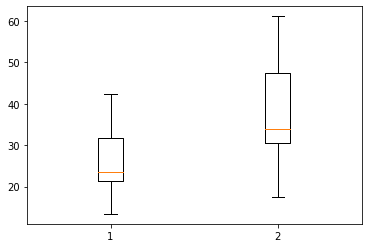

In [31]:
import matplotlib.pyplot as plt

plt.boxplot([x, y])
plt.show()

**Интерпретируем результат:** процент муниципальных служащих, состоящих в профсоюзах в 1982 в штатах, в которых не принят закон State right-to-work law больше, чем в штатах в которых он принят. 